<a href="https://colab.research.google.com/github/menna03/Data-Visualization-Project/blob/main/Project_visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
BankData = pd.read_csv('BankData_cleaned.csv', low_memory=False)

# install

In [ ]:
!pip install dash
!pip install dash
!pip install dash-bootstrap-components

# 3. Define the most important insights of takeaways from the data?



In [ ]:
BankData = pd.read_csv('BankData_cleaned.csv', low_memory=False)

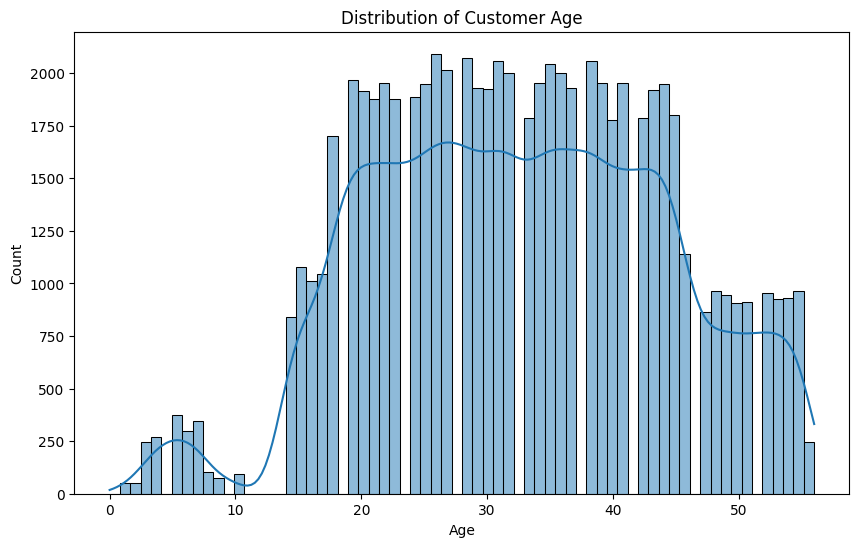

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Demographics
plt.figure(figsize=(10, 6))
sns.histplot(data=BankData, x='Age', kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


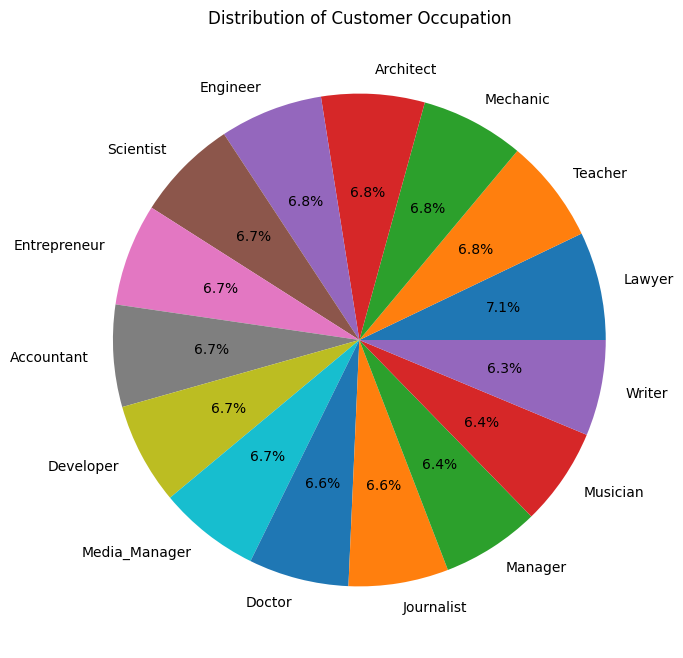

In [ ]:
plt.figure(figsize=(8, 8))
BankData['Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customer Occupation')
plt.ylabel('')
plt.show()



In [ ]:
# Change the misspelled method name
BankData['Occupation'].value_counts()

Occupation
Lawyer           4958
Teacher          4754
Mechanic         4741
Architect        4726
Engineer         4718
Scientist        4688
Entrepreneur     4684
Accountant       4671
Developer        4653
Media_Manager    4648
Doctor           4587
Journalist       4574
Manager          4497
Musician         4474
Writer           4387
Name: count, dtype: int64

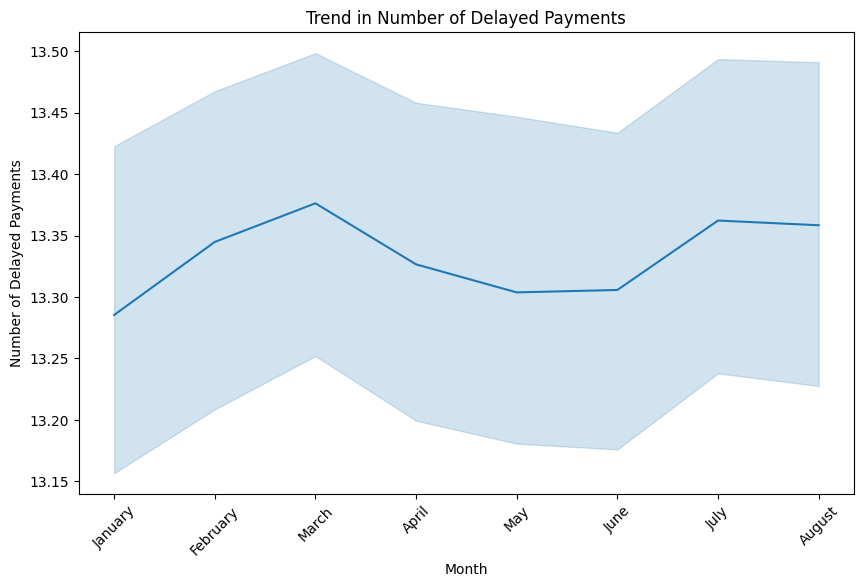

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming BankData is your DataFrame containing the data
# Convert 'Month' column to categorical with custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
BankData['Month'] = pd.Categorical(BankData['Month'], categories=custom_order, ordered=True)

# Sort DataFrame based on custom order of months
BankDataf_sorted = BankData.sort_values(by='Month')

# Plot the sorted data
plt.figure(figsize=(10, 6))
sns.lineplot(data=BankData_sorted, x='Month', y='Num_of_Delayed_Payment')
plt.title('Trend in Number of Delayed Payments')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Payments')
plt.xticks(rotation=45)
plt.show()


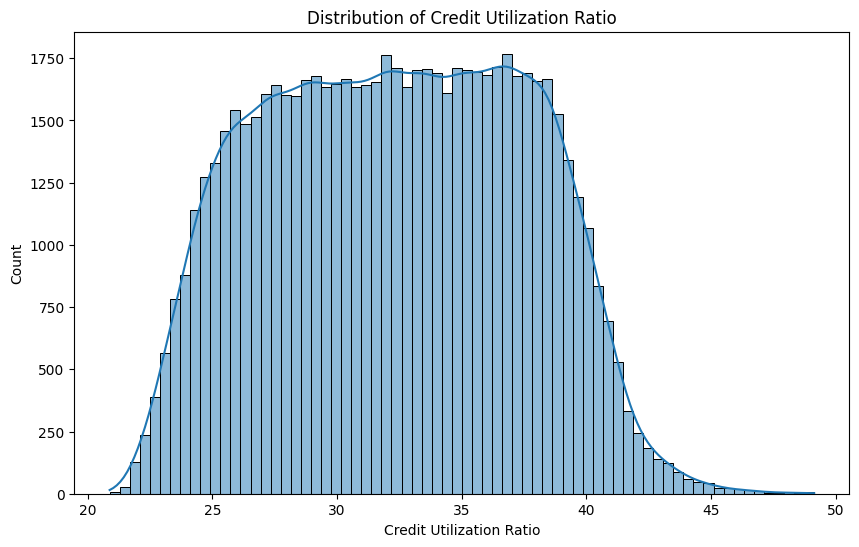

In [ ]:

# Financial Health
plt.figure(figsize=(10, 6))
sns.histplot(data=BankData, x='Credit_Utilization_Ratio', kde=True)
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Count')
plt.show()


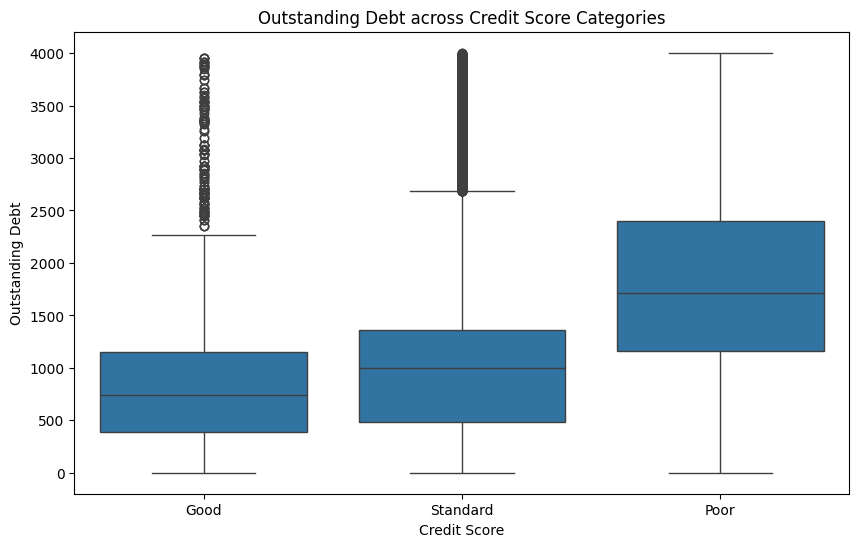

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=BankData, x='Credit_Score', y='Outstanding_Debt')
plt.title('Outstanding Debt across Credit Score Categories')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

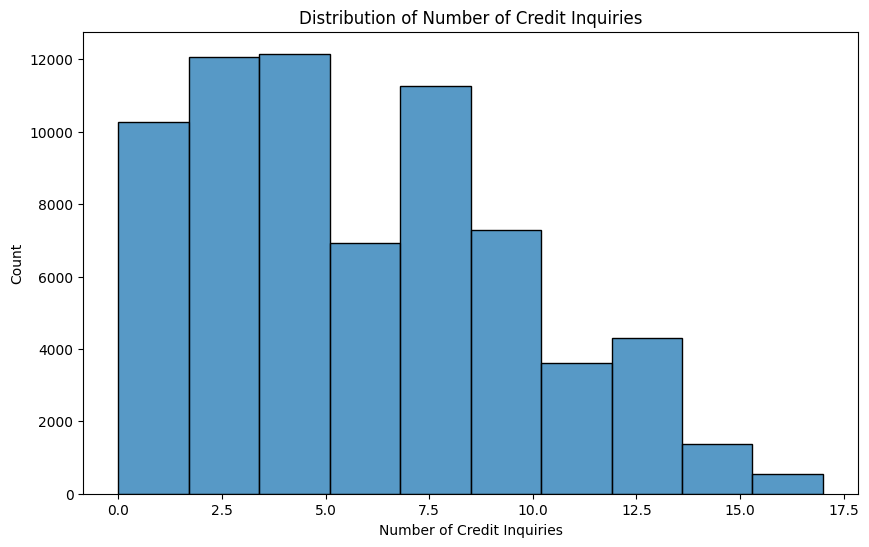

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=BankData, x='Num_Credit_Inquiries', bins=10)
plt.title('Distribution of Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Count')
plt.show()


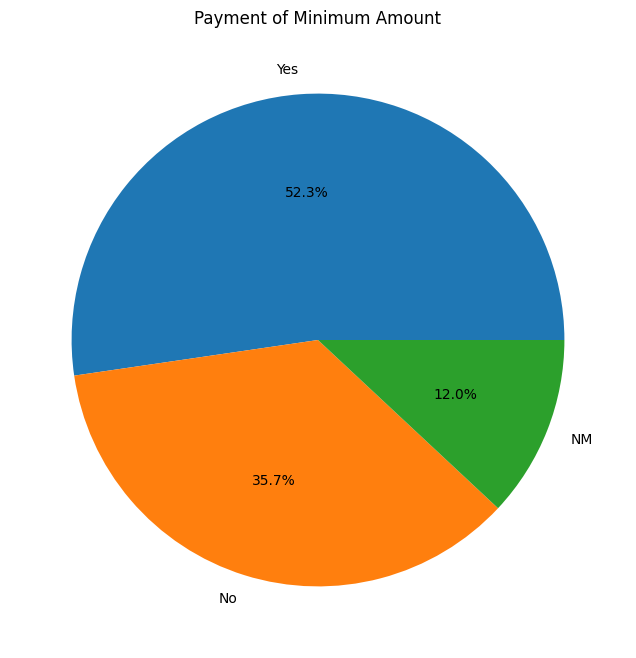

In [ ]:

# Payment Behavior
plt.figure(figsize=(8, 8))
BankData['Payment_of_Min_Amount'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment of Minimum Amount')
plt.ylabel('')
plt.show()



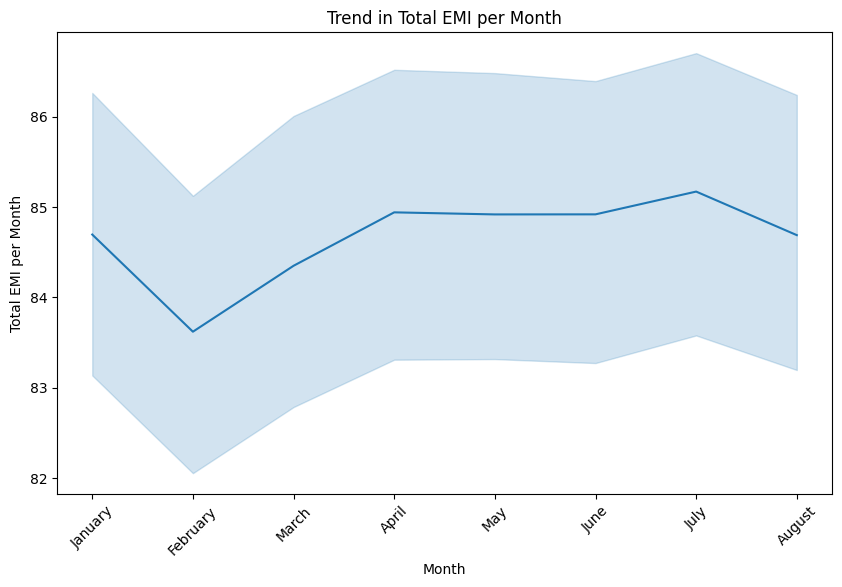

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming BankData is your DataFrame containing the data
# Convert 'Month' column to categorical with custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
BankData['Month'] = pd.Categorical(BankData['Month'], categories=custom_order, ordered=True)

# Sort DataFrame based on custom order of months
BankData_sorted = BankData.sort_values(by='Month')

# Plot the sorted data
plt.figure(figsize=(10, 6))
sns.lineplot(data=BankData_sorted, x='Month', y='Total_EMI_per_month')
plt.title('Trend in Total EMI per Month')
plt.xlabel('Month')
plt.ylabel('Total EMI per Month')
plt.xticks(rotation=45)
plt.show()



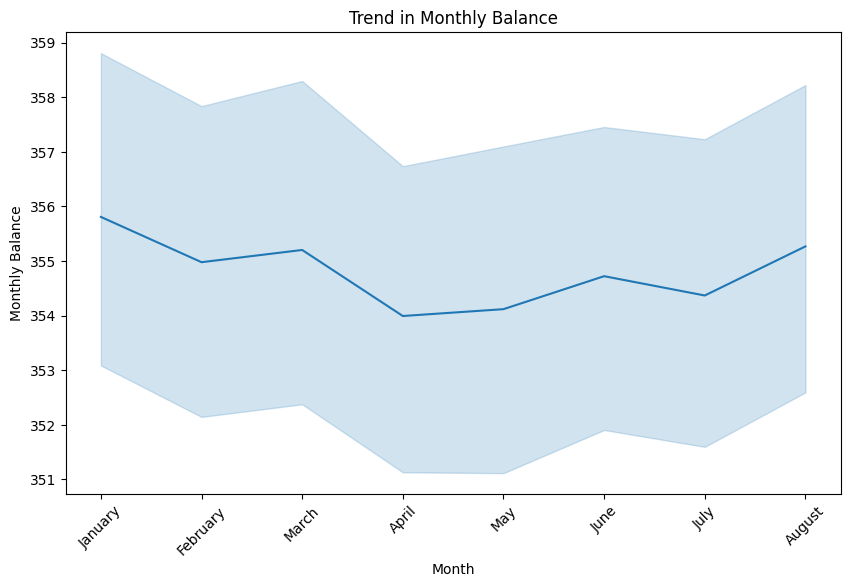

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming BankData is your DataFrame containing the data
# Convert 'Month' column to categorical with custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
BankData['Month'] = pd.Categorical(BankData['Month'], categories=custom_order, ordered=True)

# Sort DataFrame based on custom order of months
BankData_sorted = BankData.sort_values(by='Month')

# Plot the sorted data
plt.figure(figsize=(10, 6))
sns.lineplot(data=BankData_sorted, x='Month', y='Monthly_Balance')
plt.title('Trend in Monthly Balance')
plt.xlabel('Month')
plt.ylabel('Monthly Balance')
plt.xticks(rotation=45)
plt.show()


# 4. Create an interactive dashboard for the project:


In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Define BankData with your dataset
# Assuming BankData is properly defined

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Customer Demographics'),
    dcc.Dropdown(id='occupation-dropdown',
                 options=[{'label': i, 'value': i} for i in df['Occupation'].unique()],
                 value='Finance'),
    dcc.Graph(id='income-graph')
])

@app.callback(
    Output(component_id='income-graph', component_property='figure'),
    [Input(component_id='occupation-dropdown', component_property='value')]
)
def update_graph(selected_occupation):
    filtered_data = df[df['Occupation'] == selected_occupation]

    if filtered_data.empty:
        print(f"No data available for {selected_occupation}")
        return px.bar()  # Return an empty plot

    try:
        bar_fig = px.bar(filtered_data, x='Age', y='Annual_Income', barmode='group', orientation='v',
                         title=f'Income Distribution of {selected_occupation}')
        return bar_fig
    except Exception as e:
        print(f"Error creating plot: {str(e)}")
        return px.bar()  # Return an empty plot

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets

# Assuming BankData is already defined or loaded properly

def create_charts(selected_value, df):
    if selected_value == 'Age':
        fig = px.histogram(df, x='Age', title='Distribution of Ages')
    elif selected_value == 'Occupation':
        occupation_counts = df['Occupation'].value_counts().reset_index()
        occupation_counts.columns = ['Occupation', 'Count']
        fig = px.bar(occupation_counts, x='Occupation', y='Count', title='Occupation Distribution')
    else:
        fig = px.scatter(df, x='Annual_Income', y='Credit_Score', title='Annual Income vs Credit Score')
        fig.update_traces(selector=dict(mode='markers'))
    fig.show()

dropdown = widgets.Dropdown(options=['Age', 'Occupation', 'Annual Income vs Credit Score'],
                            description='Select Value:',
                            disabled=False)

def dropdown_eventhandler(change):
    create_charts(change.new, df)

dropdown.observe(dropdown_eventhandler, names='value')

create_charts('Age', df)
display(dropdown)


Dropdown(description='Select Value:', options=('Age', 'Occupation', 'Annual Income vs Credit Score'), value='A…

In [ ]:
df.dtypes

ID                            object
Customer_ID                   object
Month                       category
Name                          object
Age                          float64
SSN                           object
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                  object
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
T

In [ ]:
df = pd.read_csv('BankData_cleaned.csv', low_memory=False)

def create_credit_dashboard(selected_value, df):
    if selected_value == 'Credit Score Category vs Payment Behavior':
        fig = px.histogram(df, x='Credit_Score', color='Payment_Behaviour',
                           title='Credit Score Category vs Payment Behavior',
                           barmode='group',
                           category_orders={
                               "Credit_Score": ["Poor", "Standard", "Good"],
                               "Payment_Behaviour": [
                                   "High_spent_Small_value_payments",
                                   "Low_spent_Small_value_payments",
                                   "High_spent_Large_value_payments",
                                   "High_spent_Medium_value_payments",
                                   "Low_spent_Medium_value_payments",
                                   "Low_spent_Large_value_payments"
                               ]})
    elif selected_value == 'Credit Score Category vs Loan Types':
        fig = px.histogram(df, x='Credit_Score', color='Type_of_Loan',
                           title='Credit Score Category vs Loan Types',
                           barmode='group',
                           category_orders={
                               "Credit_Score": ["Poor", "Standard", "Good"],
                               "Type_of_Loan": [
                                   "Auto Loan", "Credit-Builder Loan", "Personal Loan",
                                   "Home Equity Loan", "payday loan", "student loan",
                                   "mortgage loan", "Debt Consolidation Loan"
                               ]})
    fig.show()

# Options for the dropdown menu
dashboard_options = [
    'Credit Score Category vs Payment Behavior',
    'Credit Score Category vs Loan Types'
]

dropdown_dashboard = widgets.Dropdown(options=dashboard_options,
                                      description='Select Dashboard:',
                                      disabled=False)

def dropdown_dashboard_eventhandler(change):
    create_credit_dashboard(change.new, df)

dropdown_dashboard.observe(dropdown_dashboard_eventhandler, names='value')

# Initial setup
create_credit_dashboard(dashboard_options[0], df)  # Initialize with the first option
display(dropdown_dashboard)

Dropdown(description='Select Dashboard:', options=('Credit Score Category vs Payment Behavior', 'Credit Score …